In [1]:

from matplotlib import pyplot as plt
import os
import numpy as np
import glob
import os

## astropy
import astropy.units as u
from astropy.table import Table

## ctapipe
from ctapipe_io_nectarcam import NectarCAMEventSource 
from ctapipe.io import event_source, EventSeeker

import scipy.stats as scsp
from scipy.stats import poisson                                                                                                             


#import seaborn as sns

chan=0

plt.rcParams['figure.figsize'] = [15, 7]

/local/home/ttaverni/anaconda3/envs/nectarchain-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))


In [2]:
        #MC_file_path ='/media/ttaverni/Transcend/MC_s/Heide/nsb0_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb125_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb250_thrs0_new_notes.simtel.gz'
        #MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes.simtel.gz'
        MC_file_path = '/media/ttaverni/Transcend/MC_s/Heide/nsb500_thrs0_new_notes_large-stat.simtel.gz'
        
        inputfile_reader = event_source(
            input_url = MC_file_path,
            max_events=7000)

        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[1].waveform[chan][:400])
        wfs_MC = np.array(all_wfs)

In [3]:
        ## NSB = 0 : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1533.000[0-9].fits.fz'
        ## NSB ~= 125 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1538.000[0-9].fits.fz'
        ## NSB <~= 250 MHz (?) : 
        #data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1539.000[0-9].fits.fz'
        ## NSB <= 500 MHz (?) : 
        data_file_path = '/media/ttaverni/Transcend/data/dataR1/NectarCAM.Run1542.000[0-9].fits.fz'
        
        
        inputfile_reader = NectarCAMEventSource(
            input_url = data_file_path,
            max_events=10000)

        cfg = inputfile_reader.camera_config
        pix_ids = cfg.expected_pixels_id[:400]
        
        all_wfs = []
        for ii, event in enumerate(inputfile_reader):
            all_wfs.append(event.r0.tel[event.r0.tels_with_data[0]].waveform[chan,pix_ids])
            if ii > len(wfs_MC)-3 : 
                break
        wfs_data = np.array(all_wfs)

In [4]:
        all_wfs_data = wfs_data
        rn_wfs_data  = all_wfs_data[:,:,:]- all_wfs_data[:,:,:].mean(axis=0)
        rn_wfs_MC    = wfs_MC[:,:,:60]    -     wfs_MC[:,:,:60].mean(axis=0)

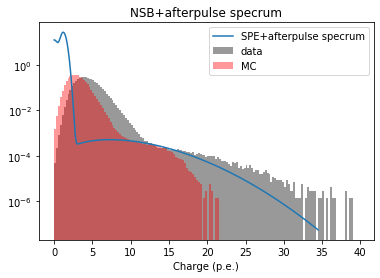

In [5]:
        n,b,p = plt.hist((rn_wfs_data.max(axis=2)/14).flatten(),bins=np.arange(0,40,0.25), \
                 color='black', alpha=.4,density=1, label = 'data') 
        n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/14).flatten(),bins=np.arange(0,40,0.25), \
                 color='red'  , alpha=.4,density=1, label = 'MC')
        
        #n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
        #         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
        plt.gca().set_yscale('log')
        plt.gca().set_xlabel('Charge (p.e.)')
        plt.gca().set_title('NSB+afterpulse specrum')
        from astropy.io import ascii
        fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
        aaa = ascii.read(fff)
        plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
        l=plt.gca().legend()

In [7]:
aftp_Q_data =[]
aftp_Q_MC =[]

for rn_wfs in rn_wfs_data:
    for rn_wf in rn_wfs:
        aftp_Q_data.append( np.max( [rn_wf[ii:ii+10].sum()/58. for ii in range(50) ] ) )

        
for rn_wfs in rn_wfs_MC:
    for rn_wf in rn_wfs:
        aftp_Q_MC.append( np.max( [rn_wf[ii:ii+10].sum()/58. for ii in range(50) ] ) )
aftp_Q_MC = np.array(aftp_Q_MC)

In [8]:
aftp_Q_data = np.array(aftp_Q_data)
aftp_Q_MC = np.array(aftp_Q_MC)

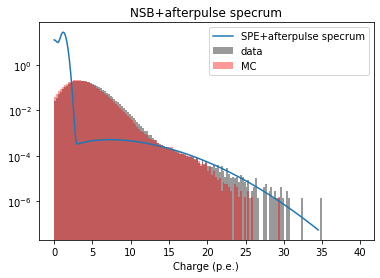

In [9]:

n,b,p = plt.hist(aftp_Q_data, bins=np.arange(0,40,0.25), \
                 color='black', alpha=.4,density=1, label = 'data') 
n,b,p = plt.hist(aftp_Q_MC, bins=np.arange(0,40,0.25), \
                 color='red'  , alpha=.4,density=1, label = 'MC')
        
#n,b,p = plt.hist((rn_wfs_MC.max(axis=2)/11).flatten(),bins=np.arange(0,40,0.25), \
#         color='green'  , alpha=.4,density=1, label = 'MC (amplitude=10)')
        
plt.gca().set_yscale('log')
plt.gca().set_xlabel('Charge (p.e.)')
plt.gca().set_title('NSB+afterpulse specrum')
from astropy.io import ascii
fff ='./spe_afterpulse_pdf_NectarCam_14032019.dat'
aaa = ascii.read(fff)
plt.plot(aaa['col1'],aaa['col3']*60*.5,label='SPE+afterpulse specrum')
l=plt.gca().legend()